### LotFrontage NOT affected by ScreenPorch

In [5]:
library(dplyr)
library(ggplot2)
library(grid)
library(gridExtra)
library(reshape2)

df.train = tbl_df(read.csv("../../data/train.csv", stringsAsFactors = FALSE))
df.test = tbl_df(read.csv("../../data/test.csv", stringsAsFactors = FALSE))
df.combined = rbind(within(df.train, rm('Id','SalePrice')), within(df.test, rm('Id')))

df.lot.frontage = df.combined %>% select(LotFrontage, ScreenPorch) %>% na.omit()
dim(df.lot.frontage)

[1] 2433    2

# A tibble: 2 x 3
  ScreenPorchIsNotZero `n()` meanLotFrontage
                 <lgl> <int>           <dbl>
1                FALSE  2220        68.76126
2                 TRUE   213        74.98122



Call:
lm(formula = LotFrontage ~ ScreenPorchIsNotZero, data = df.a1)

Residuals:
    Min      1Q  Median      3Q     Max 
-47.761 -11.761  -0.761  11.239 244.239 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)               68.7613     0.4942 139.147   <2e-16 ***
ScreenPorchIsNotZeroTRUE   6.2200     1.6701   3.724    2e-04 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 23.28 on 2431 degrees of freedom
Multiple R-squared:  0.005673,	Adjusted R-squared:  0.005264 
F-statistic: 13.87 on 1 and 2431 DF,  p-value: 0.0002004


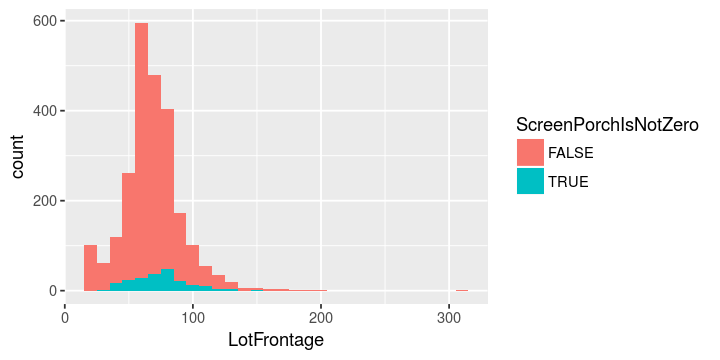

In [12]:
df.a1 = df.lot.frontage %>% group_by(ScreenPorchIsNotZero=(ScreenPorch > 0)) 
df.a2 = df.a1 %>% summarise(n(), meanLotFrontage=mean(LotFrontage))
print(df.a2)

options(repr.plot.width = 6, repr.plot.height = 3)
ggplot(df.a1 , aes(LotFrontage, fill=ScreenPorchIsNotZero)) + geom_histogram(binwidth = 10)

model.lm <- lm(LotFrontage ~ ScreenPorchIsNotZero, data = df.a1)
summary(model.lm)


Call:
lm(formula = LotFrontage ~ ScreenPorchLog, data = tmp)

Residuals:
    Min      1Q  Median      3Q     Max 
-46.150 -14.882   0.118   9.883  75.110 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)  
(Intercept)      49.032     20.790   2.358   0.0193 *
ScreenPorchLog   11.617      9.283   1.251   0.2122  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 21.88 on 211 degrees of freedom
Multiple R-squared:  0.007368,	Adjusted R-squared:  0.002663 
F-statistic: 1.566 on 1 and 211 DF,  p-value: 0.2122


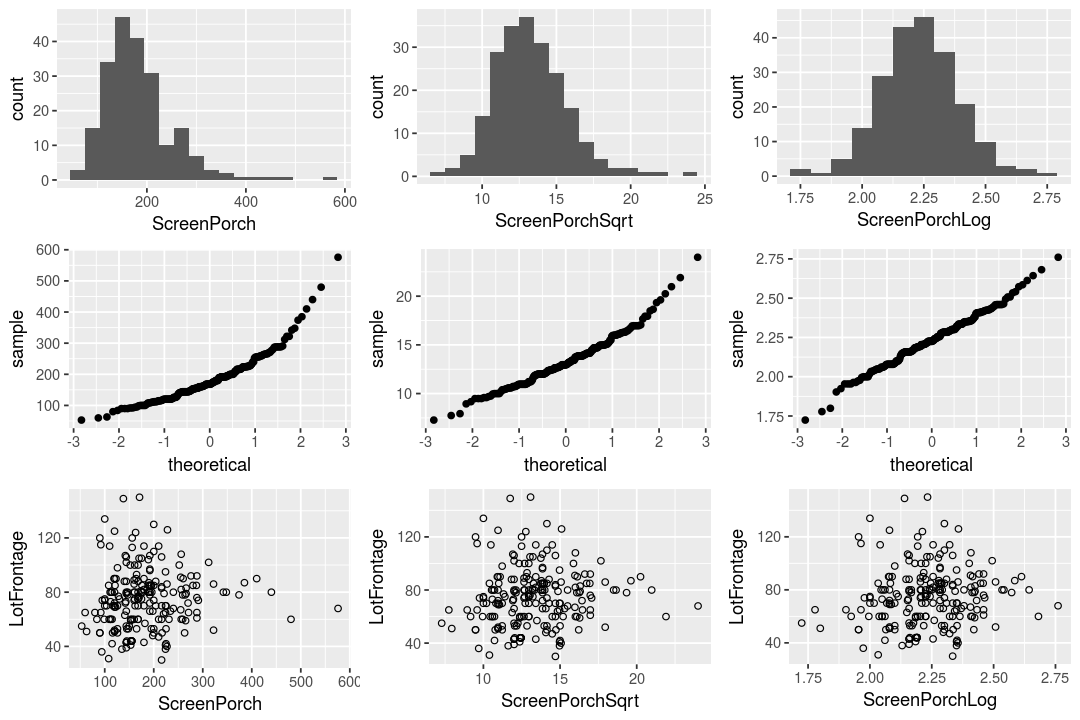

In [6]:
tmp = df.lot.frontage %>% filter(ScreenPorch > 0) %>% 
      mutate(ScreenPorchSqrt=ScreenPorch^0.5, ScreenPorchLog=log10(ScreenPorch))


options(repr.plot.width = 9, repr.plot.height = 6)
g1 = ggplot(tmp, aes(ScreenPorch)) + geom_histogram(binwidth = 30)
g2 = ggplot(tmp, aes(ScreenPorchSqrt)) + geom_histogram(binwidth = 1)
g3 = ggplot(tmp, aes(ScreenPorchLog)) + geom_histogram(binwidth = 1/12)

q1 = ggplot(tmp, aes(sample=ScreenPorch)) + stat_qq()
q2 = ggplot(tmp, aes(sample=ScreenPorchSqrt)) + stat_qq()
q3 = ggplot(tmp, aes(sample=ScreenPorchLog)) + stat_qq()

s1 = ggplot(tmp, aes(x=ScreenPorch, y=LotFrontage)) + geom_point(shape=1)
s2 = ggplot(tmp, aes(x=ScreenPorchSqrt, y=LotFrontage)) + geom_point(shape=1)
s3 = ggplot(tmp, aes(x=ScreenPorchLog, y=LotFrontage)) + geom_point(shape=1)

grid.arrange(g1, g2, g3, 
             q1, q2, q3,
             s1, s2, s3, 
             layout_matrix=rbind(c(1, 2, 3), 
                                 c(4, 5, 6),
                                 c(7, 8, 9)))

model.lm <- lm(LotFrontage ~ ScreenPorchLog, data = tmp)
summary(model.lm)